# Notebook Overview

In this notebook, we perform an Exploratory Data Analysis on a dataset that classifies patients in the ICU that will develop Sepsis and those that will not develop Sepsis


# Set Up



**Installation**

Here is the section where we installed all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# Installatin of p#ackages
#!pip install numpy
#!pip install pandas
#!pip install patool
#!pip install forex_python
#!pip install pandas_profiling
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
#!pip install -U imbalanced-learn

# Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data handling
import pandas as pd
import numpy as np
from statistics import mean
from forex_python.converter import CurrencyRates
from babel.numbers import format_currency
import datetime as dt

# Statistics
from scipy import stats
from scipy.stats import shapiro, trim_mean, mstats, mode
from scipy.stats import ttest_ind


# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn


# balance data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Machine learning libraries and metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, Binarizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Other packages
import os
import warnings
warnings.filterwarnings('ignore')
import patoolib
import pickle
from sklearn.pipeline import Pipeline

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
test_df= pd.read_csv(r"C:\Users\GilB\OneDrive\Documents\Git Repo\Machine-Learning-API-using-FastAPI\datasets\Paitients_Files_Test.csv")
train_df= pd.read_csv(r"C:\Users\GilB\OneDrive\Documents\Git Repo\Machine-Learning-API-using-FastAPI\datasets\Paitients_Files_Train.csv")                           
                           

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

In [4]:
# A quick look at the shape of our dataset

train_df.shape

(599, 11)

In [5]:
#Lookinag at the head of our dataset

train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [6]:
#Taking a look at the tail
train_df.tail()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative
598,ICU200608,1,173,74,0,0,36.8,0.088,38,1,Positive


##### Description of Columns 

ID	-	Unique number to represent patient ID

PRG - 	Plasma glucose

PL	-	Blood Work Result-1 (mu U/ml)

PR	-	Blood Pressure (mm Hg) 

SK	-	Blood Work Result-2 (mm)

TS	-   Blood Work Result-3 (mu U/ml)

M11	-	Body mass index (weight in kg/(height in m)^2

BD2	-	Blood Work Result-4 (mu U/ml)

Age	-	patients age (years)

Insurance	- If a patient holds a valid insurance card

Sepssis	Target	Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

In [7]:
#Look at the columns in the dataset and their data types

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [8]:
#Get more details about the features of our data
train_df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#Check for missing values
train_df.isna().sum()



ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

<AxesSubplot: >

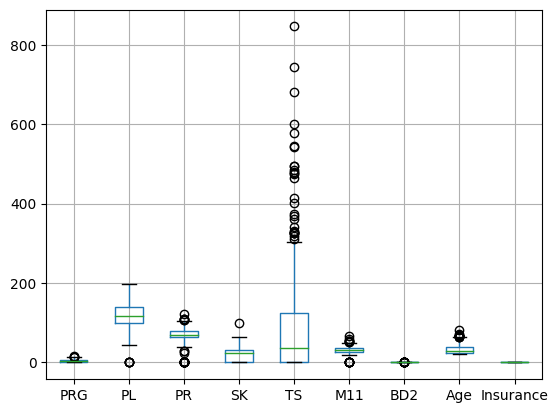

In [10]:
#Check for outliers
train_df.boxplot()

## Issues With the Data


Too many zeros in each column

The column names are not very descriptive.

The target variable 'Sepssis' may have imbalanced classes.

There are many outliers in some of the numerical columns.

There could be correlations between some of the predictor variables, leading to multicollinearity.


## How I Intend to Solve Them

Replace zeros in each column with the median value

Rename the column names to be more descriptive and easier to understand.

Handle the imbalanced classes in the target variable using techniques such as undersampling or oversampling.

Use visualization techniques such as box plots and scatter plots to identify and handle any outliers.

Use correlation analysis to identify highly correlated variables and consider dropping or transforming them.

## Hypothesis

***Null Hypothesis:*** Age does not determine whether a patient will develop Sepssis

***Alternate Hypothesis:*** Age determines whether a pateint will develop Sepssis

##  Questions

1. Is the train dataset complete?
2. What are the ages of the youngest and oldest patients?
3. What are the youngest and oldest patients with Sepssis?
4. What is the average age ?
5. What is the ratio of patients who are positive for sepssis to the negative patients ?
6. What is the highest and lowest BMI?
7. What is the average BMI ?
8. Is there a corelation between the Sepssis status and the other attributes? 

## Univariate Analysis

In [11]:
# First Rename the columns
train_df = train_df.rename(columns={
    "PRG": "Plasma_glucose",
    "PL": "Blood_Work_R1",
    "PR": "Blood_Pressure",
    "SK": "Blood_Work_R2",
    "TS": "Blood_Work_R3",
    "M11": "BMI",
    "BD2": "Blood_Work_R4",
    "Age": "Patient_age",
    "Sepssis": "Target"
})

In [12]:
numerical_features = ['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age']

#### Positive Sepssis Cases 

In [13]:
positive_cases = train_df[train_df['Target'] == 'Positive']
positive_cases

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Target
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
6,ICU200016,3,78,50,32,88,31.0,0.248,26,0,Positive
8,ICU200018,2,197,70,45,543,30.5,0.158,53,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
588,ICU200598,3,176,86,27,156,33.3,1.154,52,0,Positive
590,ICU200600,11,111,84,40,0,46.8,0.925,45,0,Positive
592,ICU200602,3,132,80,0,0,34.4,0.402,44,0,Positive
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive


Age

In [14]:
positive_age_stats = positive_cases['Patient_age'].describe()
positive_age_stats 

count    208.000000
mean      36.697115
std       10.904929
min       21.000000
25%       28.000000
50%       35.000000
75%       43.250000
max       67.000000
Name: Patient_age, dtype: float64

In [15]:
no_positives= positive_age_stats['count']
print(f'The no of patients diagnosed with Sepssis is {no_positives}')

The no of patients diagnosed with Sepssis is 208.0


In [16]:
positive_mean_age = positive_age_stats['mean']
print(f'The mean age of patients with Sepssis is: {positive_mean_age:.2f} years')

The mean age of patients with Sepssis is: 36.70 years


In [17]:
highest_positive_age = positive_age_stats['max']
print(f'The oldest patient with Sepssis is {highest_positive_age} years old')

The oldest patient with Sepssis is 67.0 years old


In [18]:
lowest_positive_age = positive_age_stats['min']
print(f'The youngest patient with Sepssis is {lowest_positive_age} years old')

The youngest patient with Sepssis is 21.0 years old


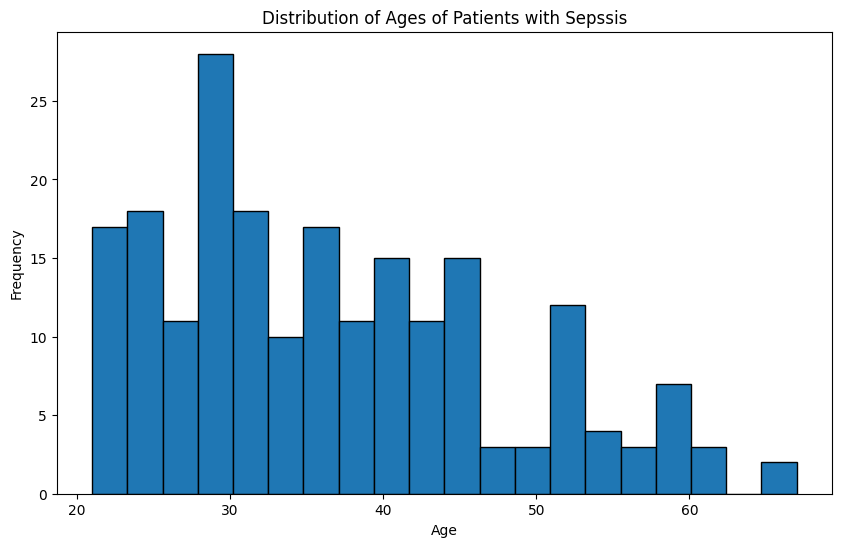

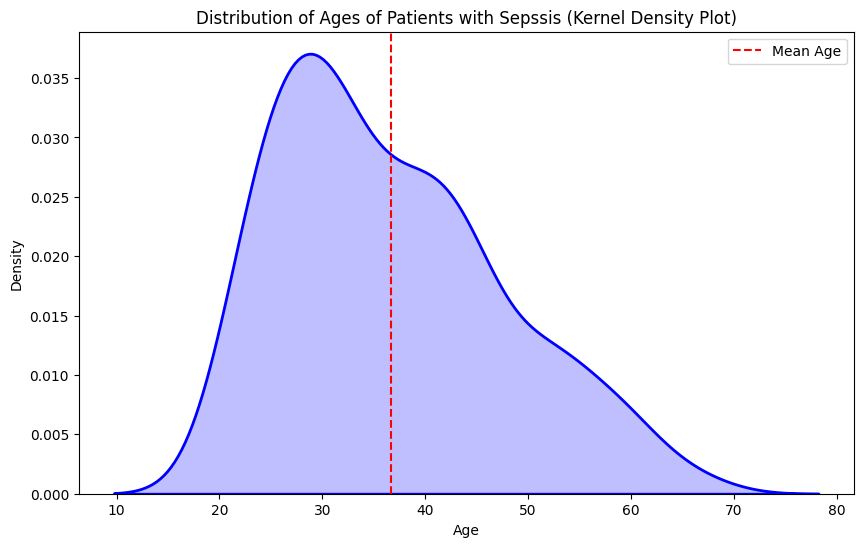

In [19]:
# Extract the 'age' column from the DataFrame
ages = positive_cases['Patient_age']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages of Patients with Sepssis')
plt.show()

# Create a kernel density plot
plt.figure(figsize=(10, 6))
sn.kdeplot(ages, shade=True, color='blue', linewidth=2)
plt.axvline(positive_mean_age, color='red', linestyle='--', label='Mean Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages of Patients with Sepssis (Kernel Density Plot)')
plt.legend()
plt.show()

BMI

In [20]:
positive_bmi_stats = positive_cases['BMI'].describe()
positive_bmi_stats

count    208.000000
mean      35.385577
std        7.195898
min        0.000000
25%       30.975000
50%       34.300000
75%       39.025000
max       67.100000
Name: BMI, dtype: float64

In [21]:
positive_mean_bmi = positive_bmi_stats['mean']
print(f'The average BMI for patients with Sepssis is {positive_mean_bmi:.2f}')

The average BMI for patients with Sepssis is 35.39


In [22]:
highest_bmi = positive_bmi_stats['max']
print(f'The highest BMI for a patient with Sepssis is {highest_bmi}')

The highest BMI for a patient with Sepssis is 67.1


In [23]:
lowest_positive_bmi = positive_bmi_stats['min']
print(f'The lowest BMI for a patient with Sepssis is {lowest_positive_bmi}')

The lowest BMI for a patient with Sepssis is 0.0


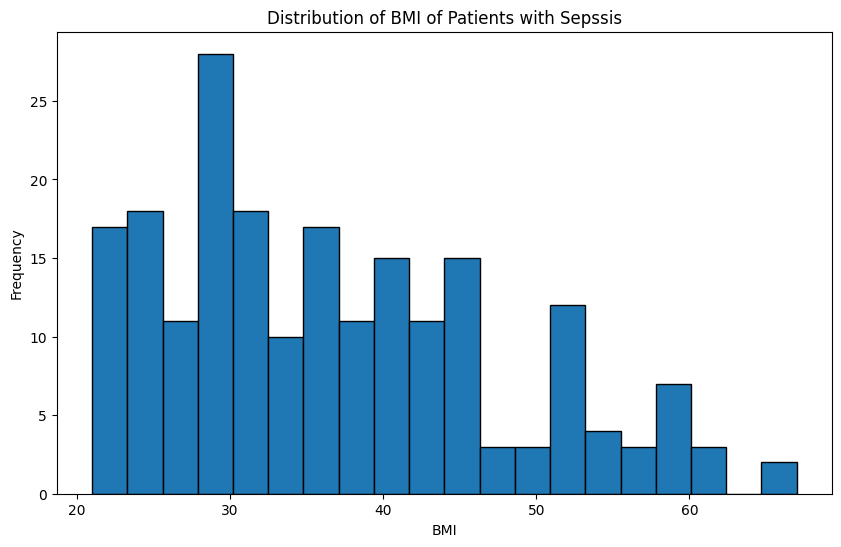

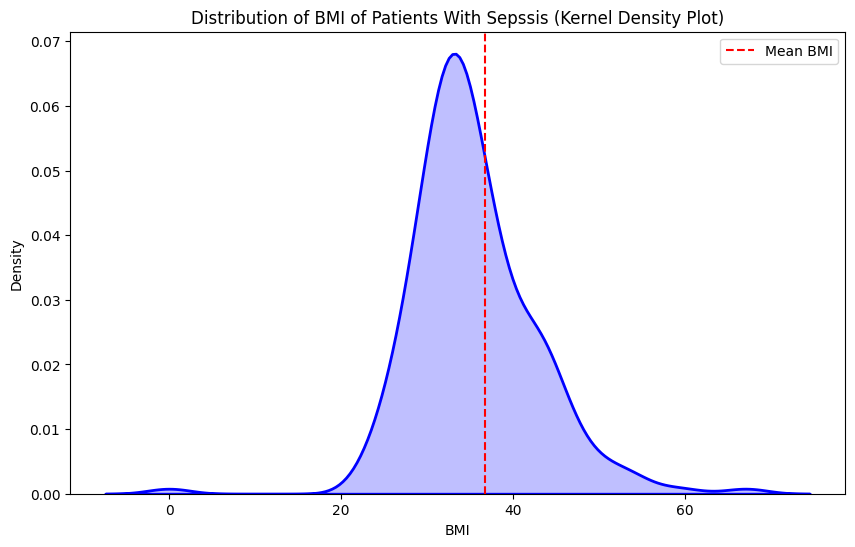

In [24]:
# Extract the BMI 'M11' column from the DataFrame
BMI = positive_cases['BMI']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI of Patients with Sepssis')
plt.show()

# Create a kernel density plot
plt.figure(figsize=(10, 6))
sn.kdeplot(BMI, shade=True, color='blue', linewidth=2)
plt.axvline(positive_mean_age, color='red', linestyle='--', label='Mean BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Distribution of BMI of Patients With Sepssis (Kernel Density Plot)')
plt.legend()
plt.show()

#### Negative Sepssis Cases

AGE

In [25]:
negative_cases = train_df[train_df['Target'] == 'Negative']
negative_cases

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Target
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
5,ICU200015,5,116,74,0,0,25.6,0.201,30,1,Negative
7,ICU200017,10,115,0,0,0,35.3,0.134,29,1,Negative
10,ICU200020,4,110,92,0,0,37.6,0.191,30,0,Negative
...,...,...,...,...,...,...,...,...,...,...,...
591,ICU200601,2,112,78,50,140,39.4,0.175,24,0,Negative
593,ICU200603,2,82,52,22,115,28.5,1.699,25,0,Negative
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative


In [26]:
negative_age_stats = negative_cases['Patient_age'].describe()
negative_age_stats 

count    391.000000
mean      31.478261
std       11.913531
min       21.000000
25%       23.000000
50%       27.000000
75%       37.000000
max       81.000000
Name: Patient_age, dtype: float64

In [27]:
No_Negative = negative_age_stats['count']
print (f'No of patients without Sepssis is {No_Negative}')

No of patients without Sepssis is 391.0


In [28]:
mean_age = negative_age_stats['mean']
print(f'The mean age for patients without Sepssis is: {mean_age:.2f} years')


The mean age for patients without Sepssis is: 31.48 years


In [29]:
highest_negative_age = negative_age_stats['max']
print(f'The oldest patient without Sepssis is {highest_negative_age} years old')

The oldest patient without Sepssis is 81.0 years old


In [30]:
lowest_negative_age = negative_age_stats['min']
print(f'The youngest patient withot Sepssis is {lowest_negative_age} years old')

The youngest patient withot Sepssis is 21.0 years old


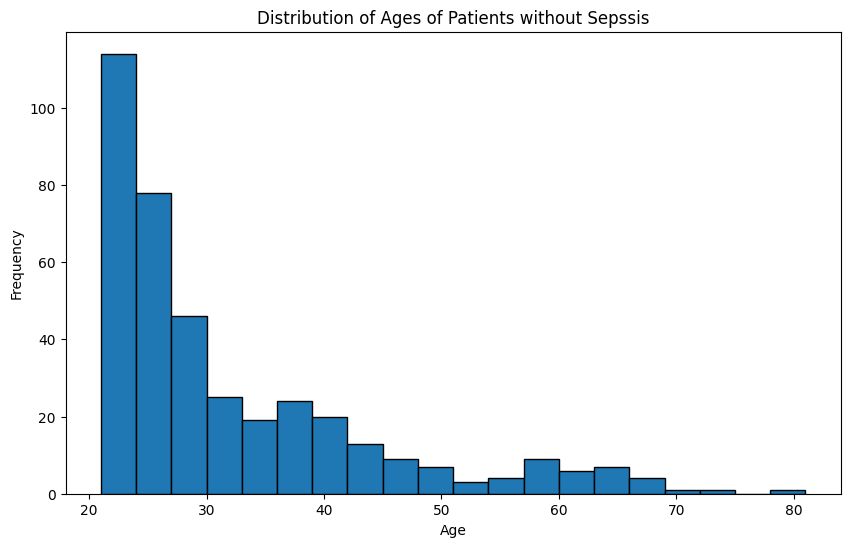

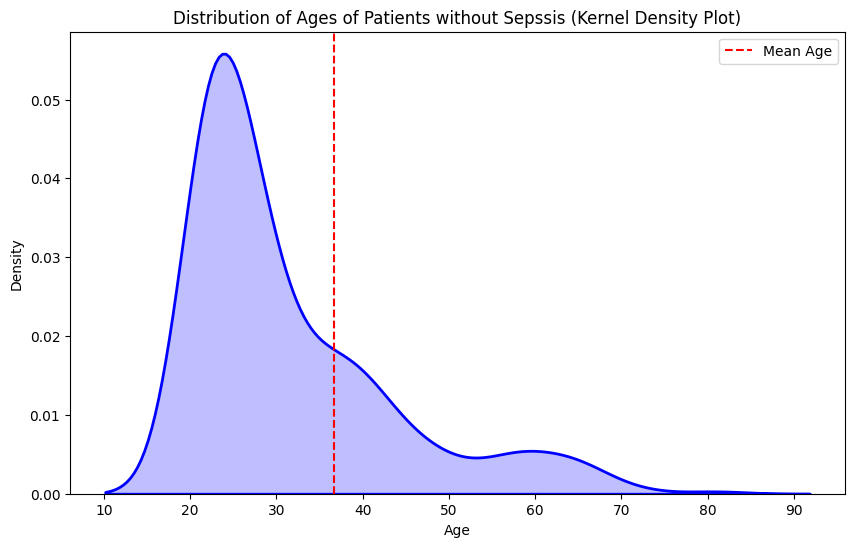

In [31]:
# Extract the 'age' column from the DataFrame
ages = negative_cases['Patient_age']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages of Patients without Sepssis')
plt.show()

# Create a kernel density plot
plt.figure(figsize=(10, 6))
sn.kdeplot(ages, shade=True, color='blue', linewidth=2)
plt.axvline(positive_mean_age, color='red', linestyle='--', label='Mean Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages of Patients without Sepssis (Kernel Density Plot)')
plt.legend()
plt.show()

BMI

In [32]:
negative_bmi_stats = negative_cases['BMI'].describe()
negative_bmi_stats

count    391.000000
mean      30.076471
std        7.812732
min        0.000000
25%       25.200000
50%       29.900000
75%       35.050000
max       52.300000
Name: BMI, dtype: float64

In [33]:
negative_mean_bmi = negative_bmi_stats['mean']
print(f'The mean BMI for patients without Sepssis is: {negative_mean_bmi:.2f}')

The mean BMI for patients without Sepssis is: 30.08


In [34]:
highest_negative_bmi = negative_bmi_stats['max']
print(f'The highest BMI for a  patient without Sepssis is {highest_negative_bmi}')

The highest BMI for a  patient without Sepssis is 52.3


In [35]:
lowest_negative_bmi = negative_bmi_stats['min']
print(f'The lowest BMI for a patient withot Sepssis is {lowest_negative_bmi}')

The lowest BMI for a patient withot Sepssis is 0.0


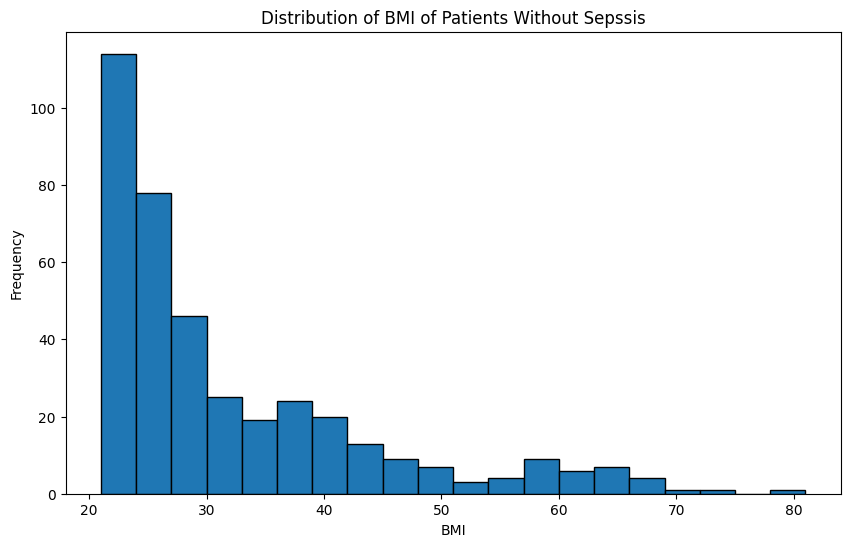

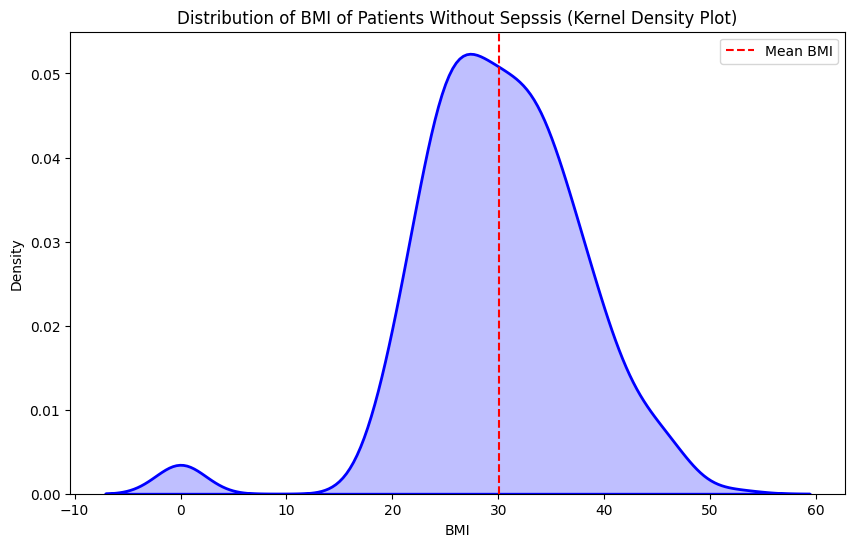

In [36]:
# Extract the BMI 'M11' column from the DataFrame
BMI = negative_cases['BMI']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI of Patients Without Sepssis')
plt.show()

# Create a kernel density plot
plt.figure(figsize=(10, 6))
sn.kdeplot(BMI, shade=True, color='blue', linewidth=2)
plt.axvline(negative_mean_bmi, color='red', linestyle='--', label='Mean BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Distribution of BMI of Patients Without Sepssis (Kernel Density Plot)')
plt.legend()
plt.show()

## Univariate Analysis

#### Graphically Displaying all other numerical columns using Histogram 

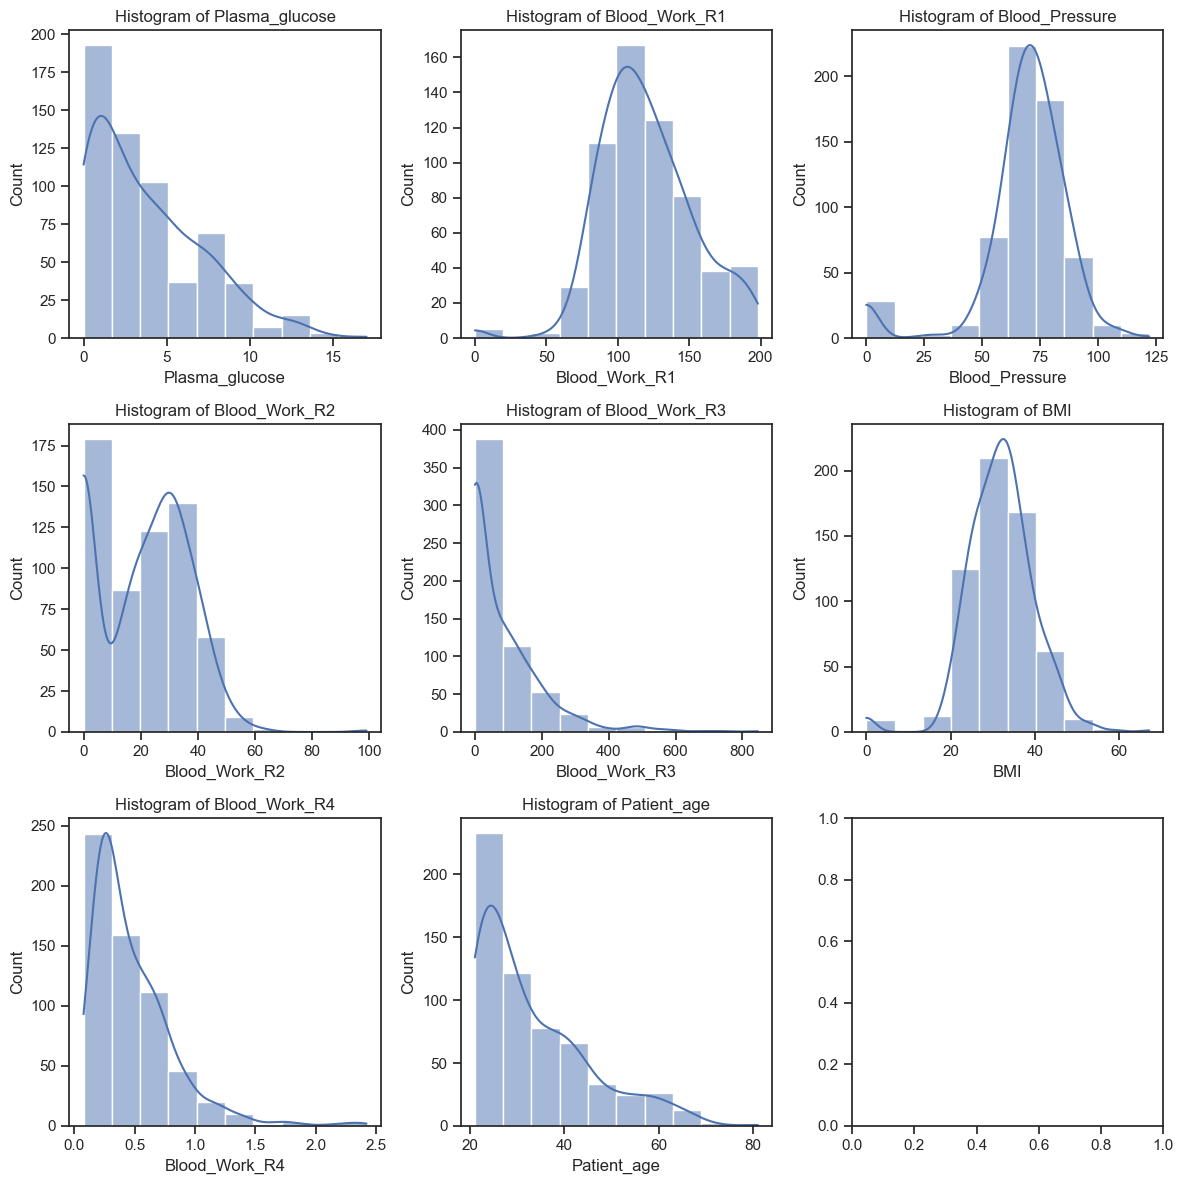

In [37]:
# Set the style for the plot
sn.set(style="ticks", color_codes=True)

# Create a grid of 3 by 3 subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the axes array
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical_features):
    sn.histplot(data=train_df, x=col, kde=True, bins=10, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

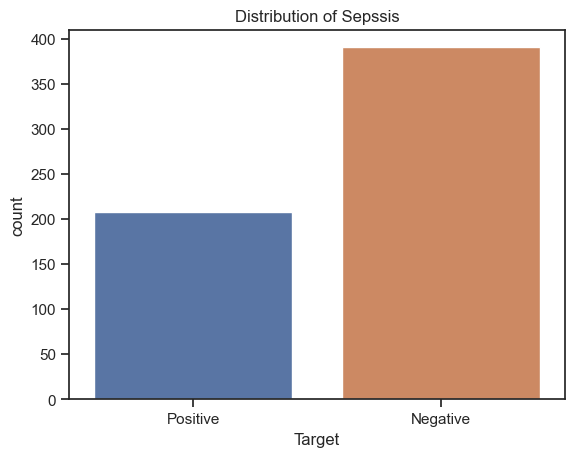

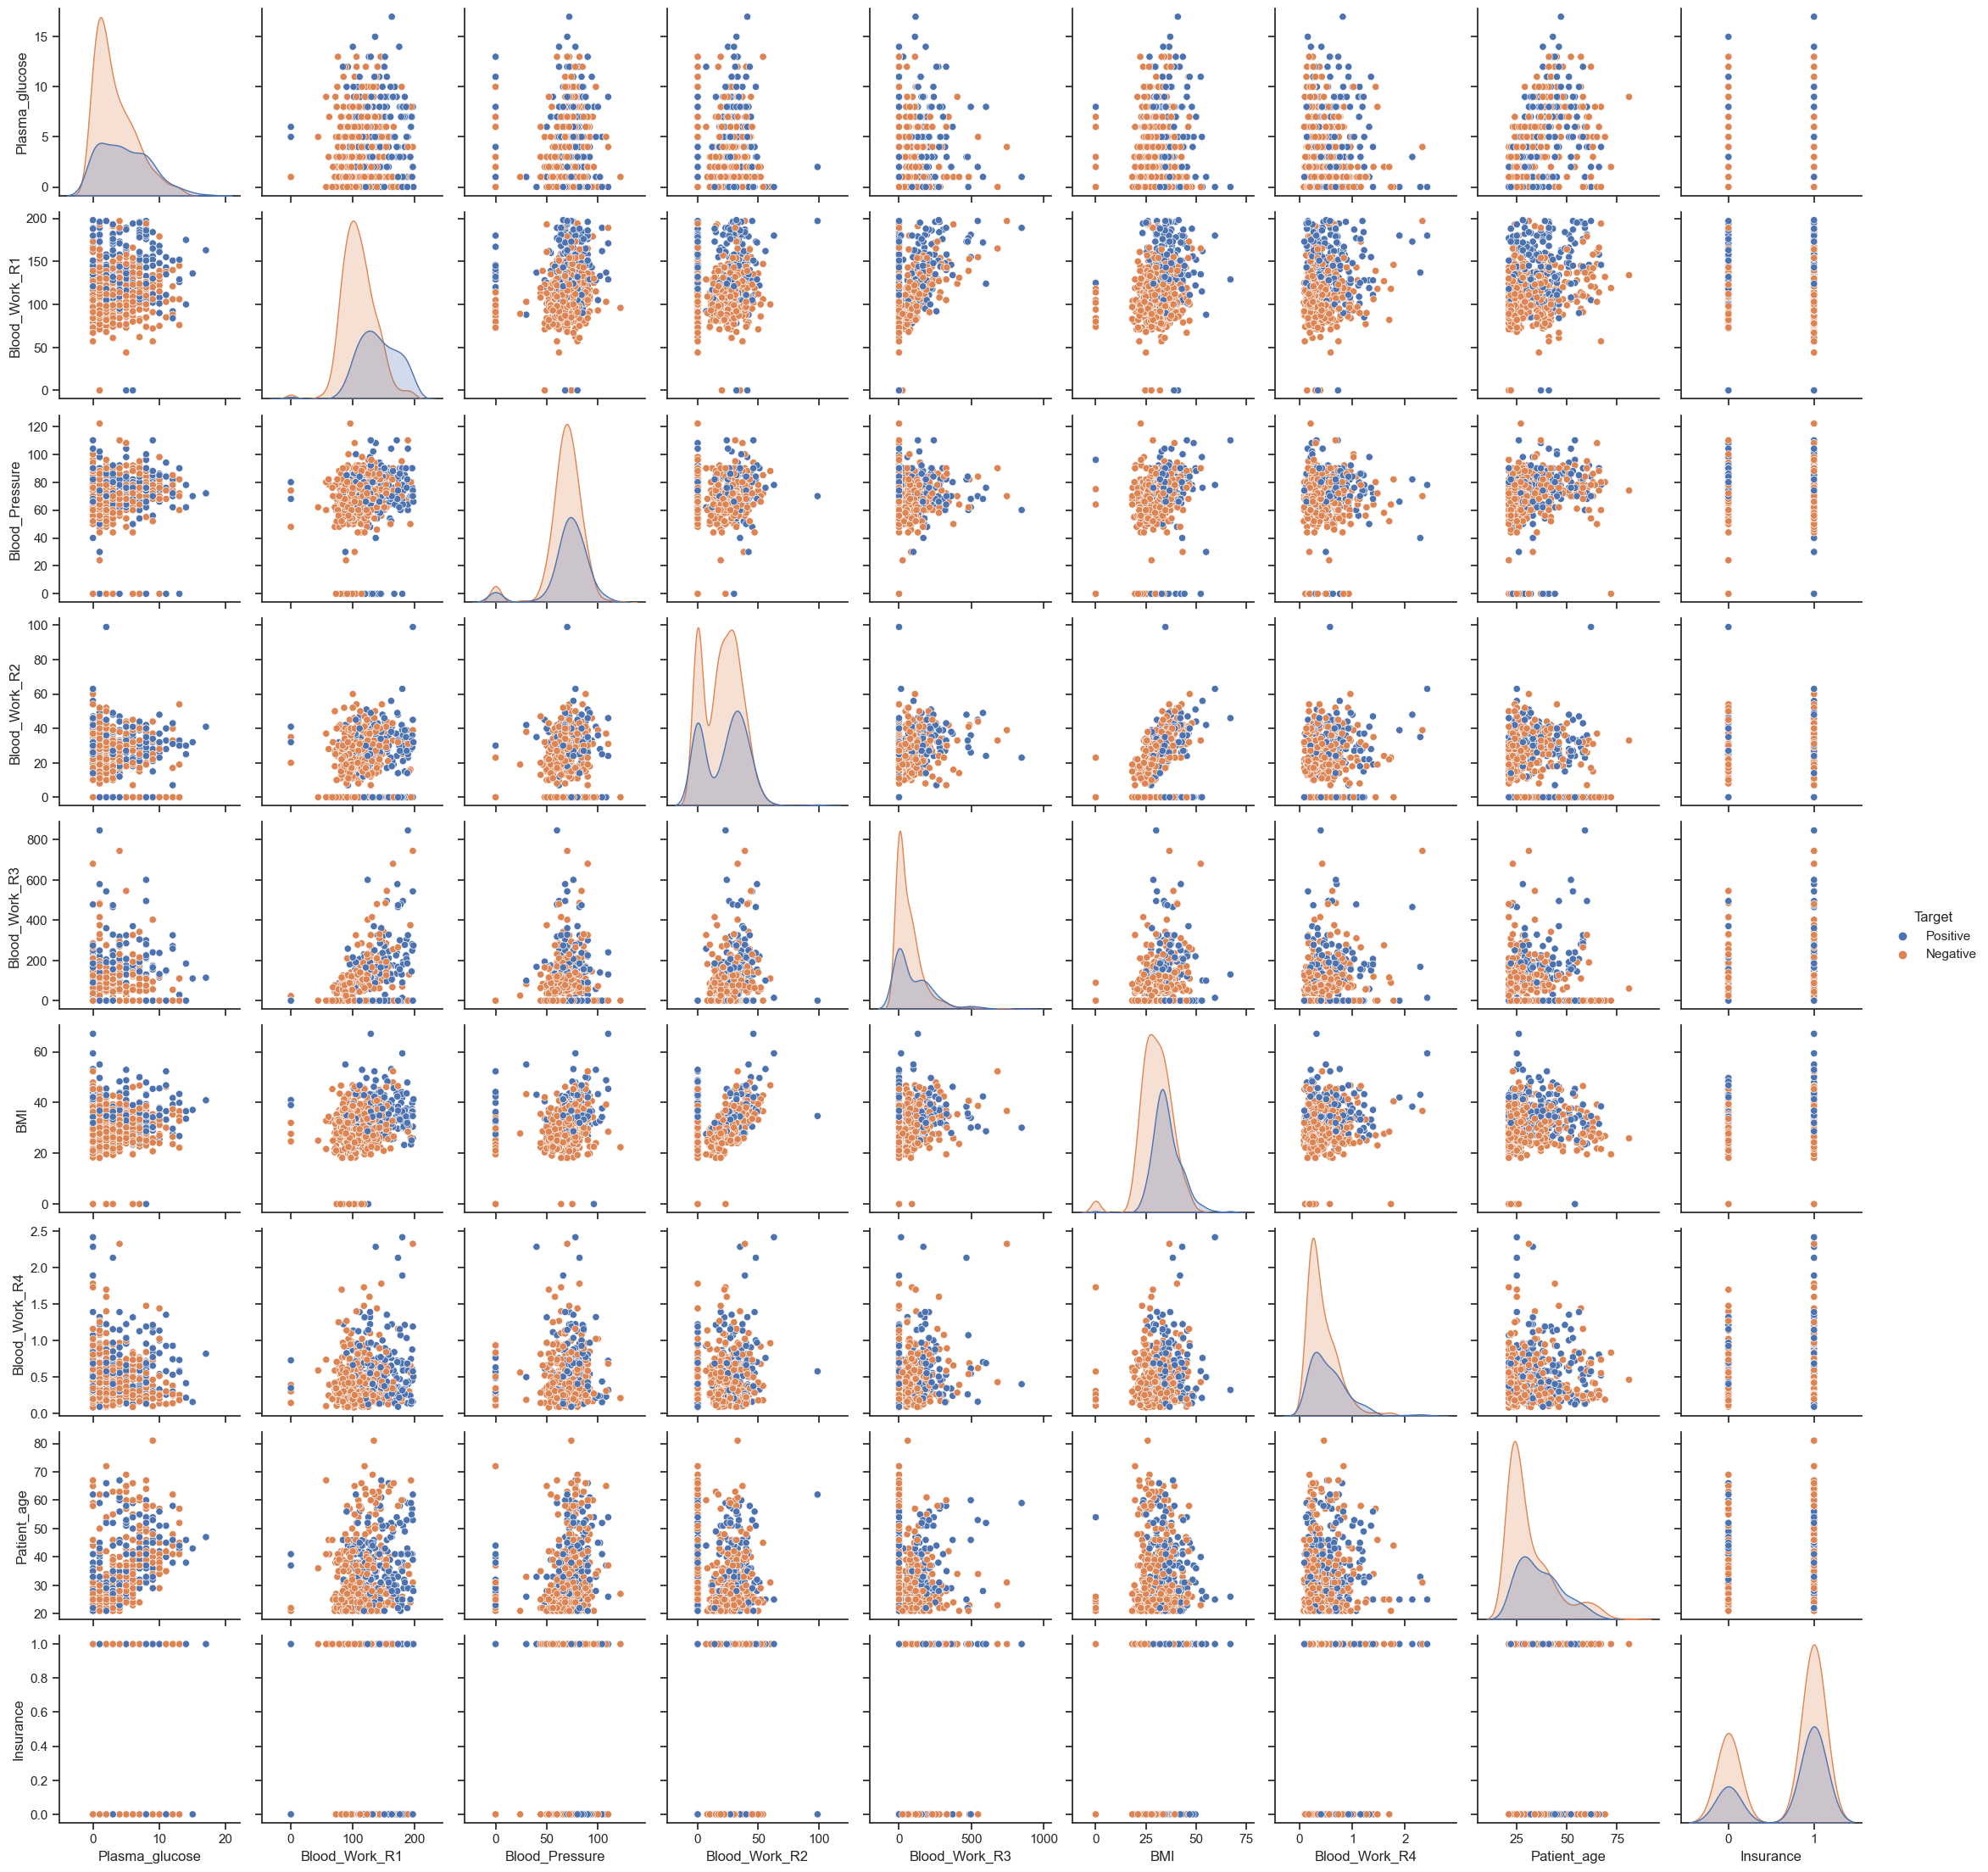

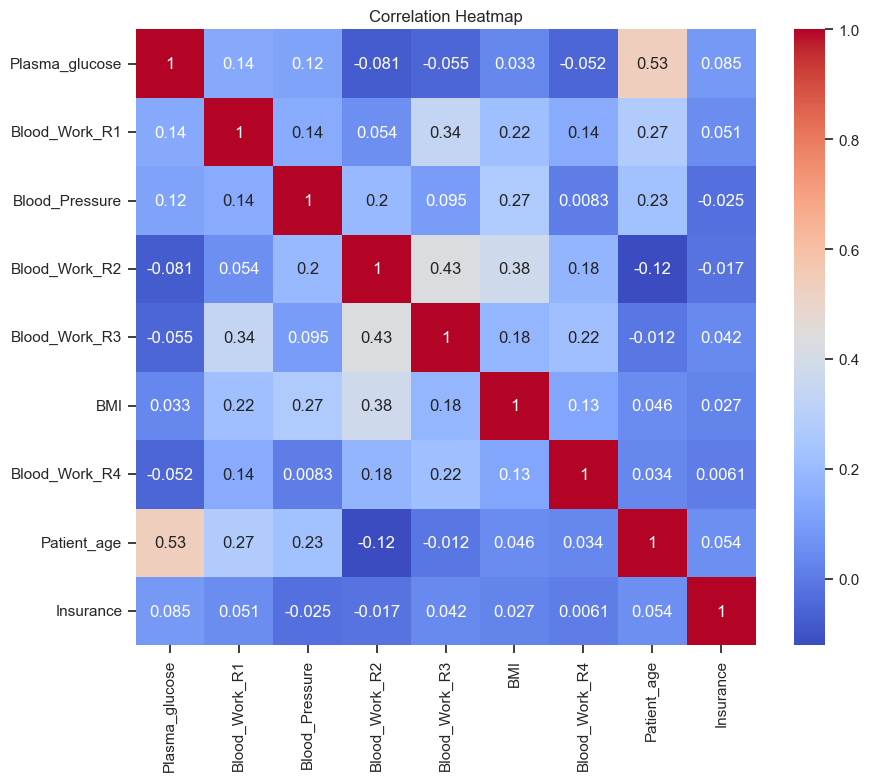

In [38]:
# Distribution of the target variable (Sepssis)
sn.countplot(x='Target', data=train_df)
plt.title('Distribution of Sepssis')
plt.show()

# Pairplot to visualize relationships between variables
sn.pairplot(train_df, hue='Target', diag_kind='kde')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

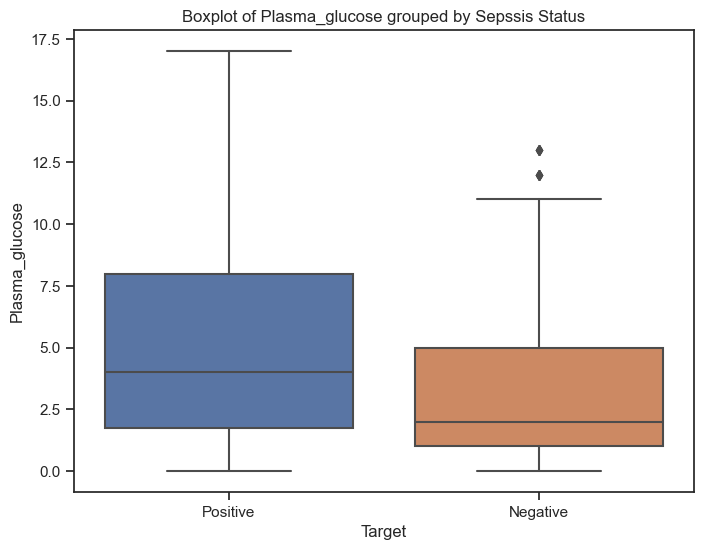

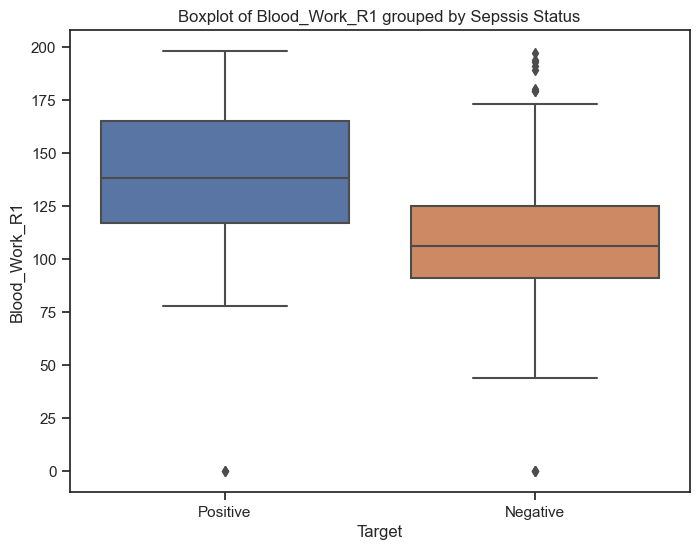

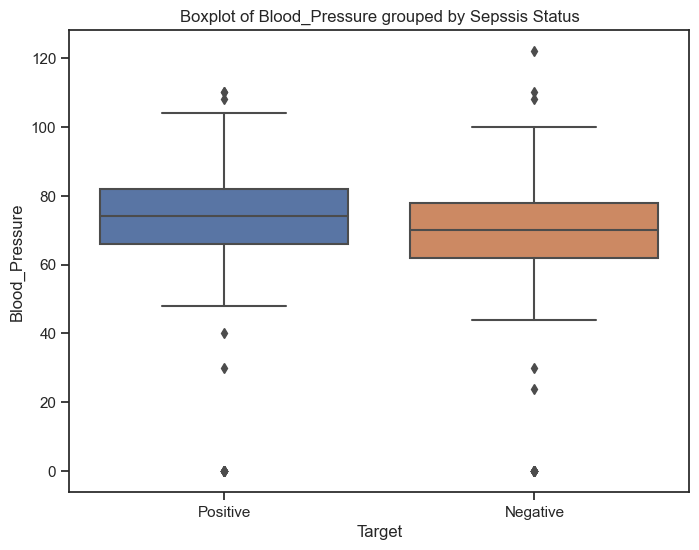

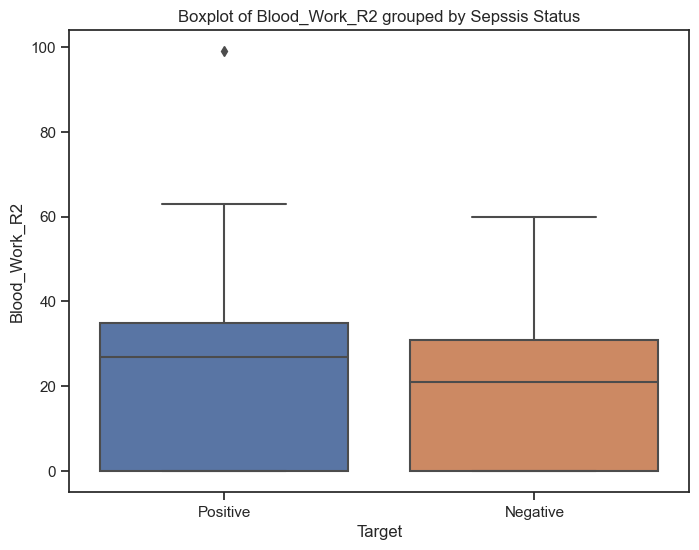

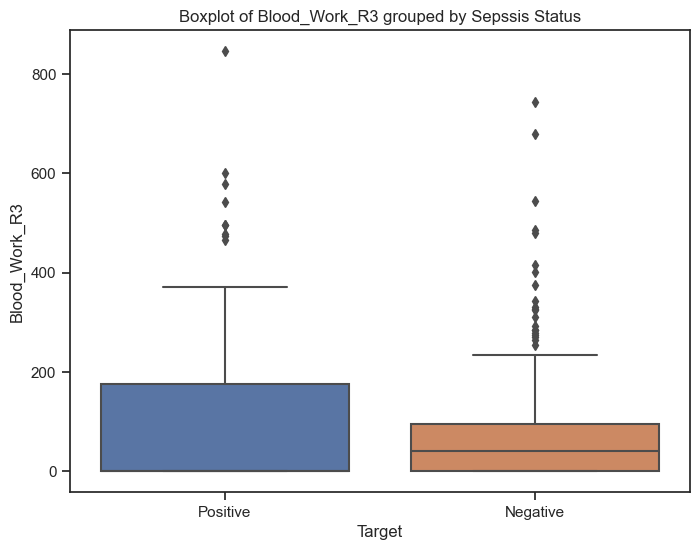

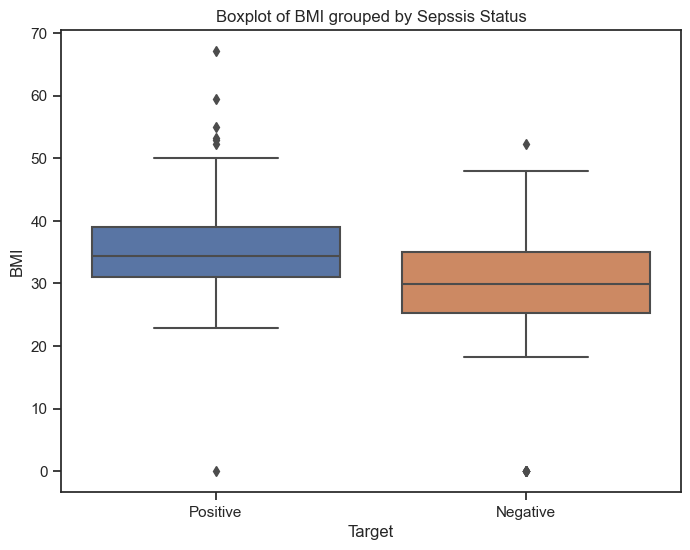

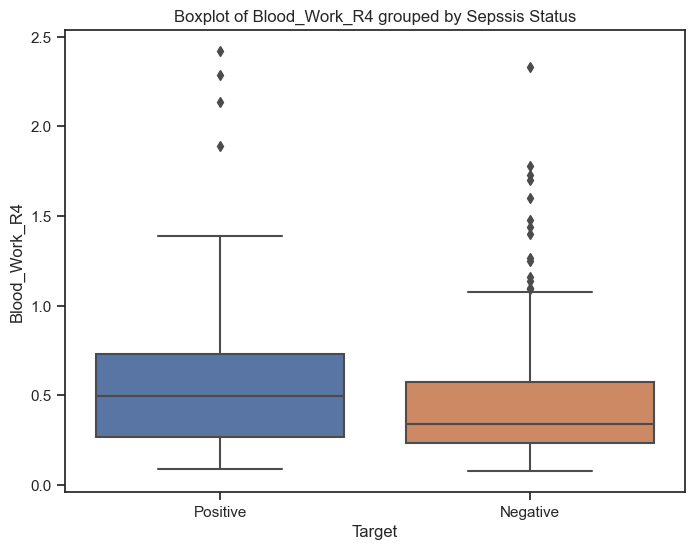

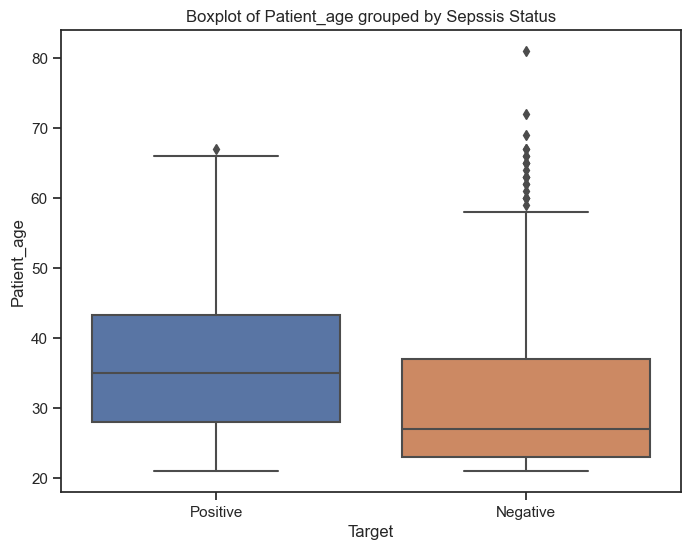

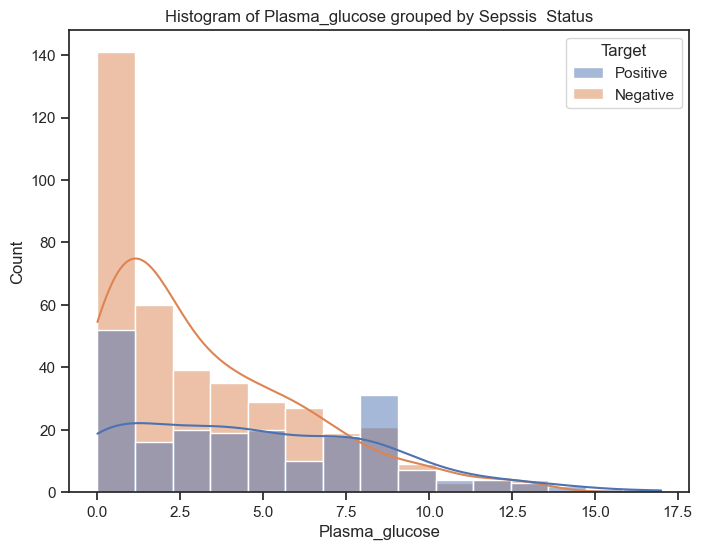

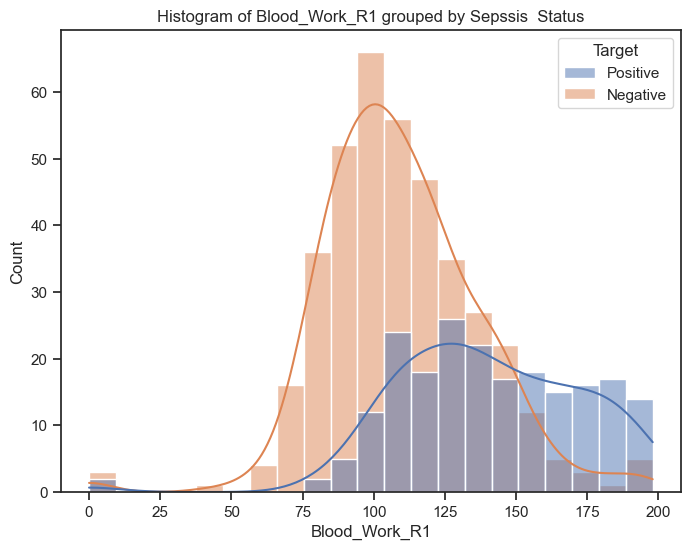

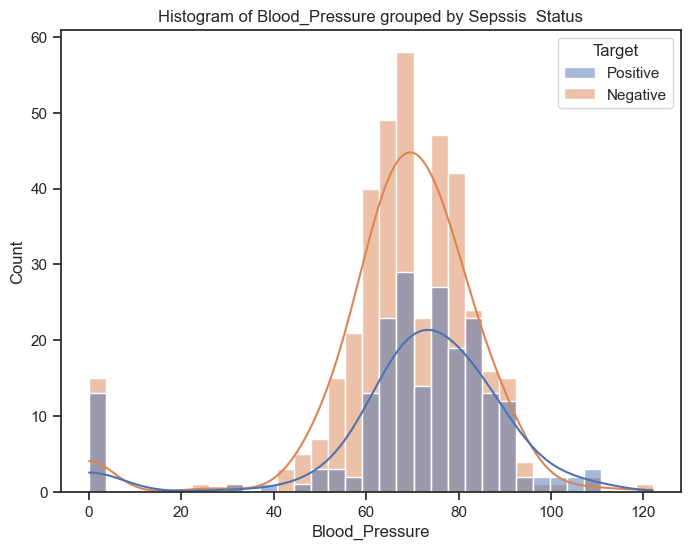

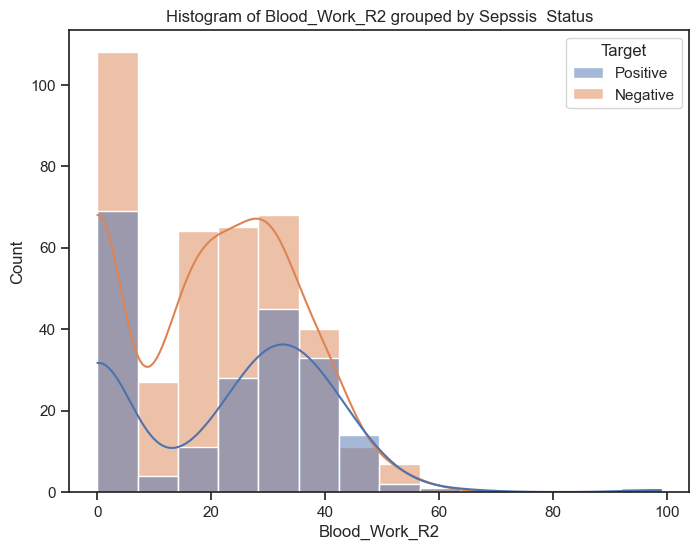

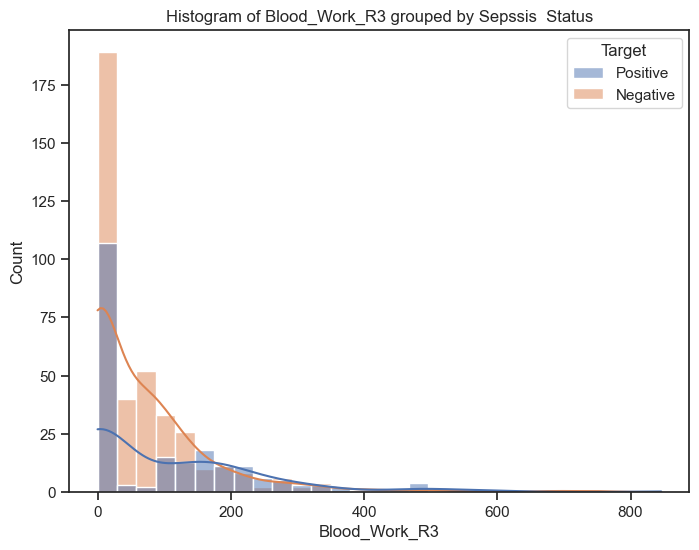

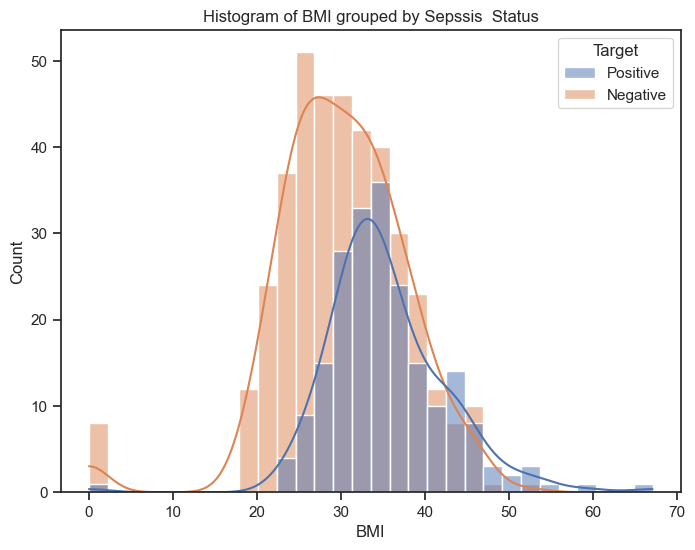

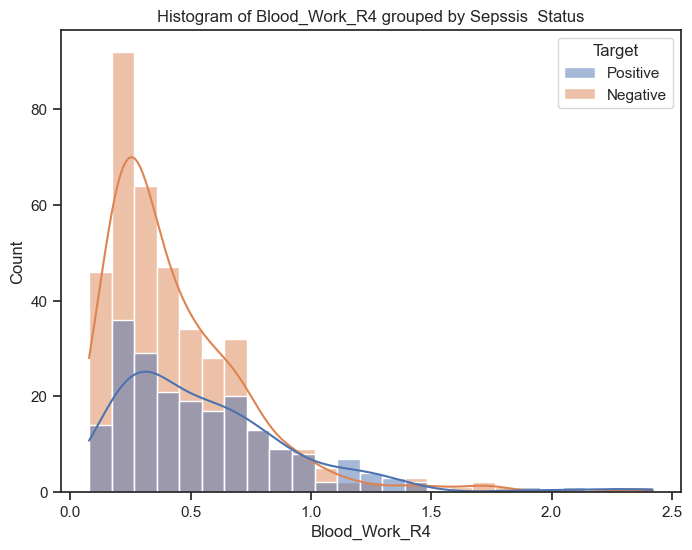

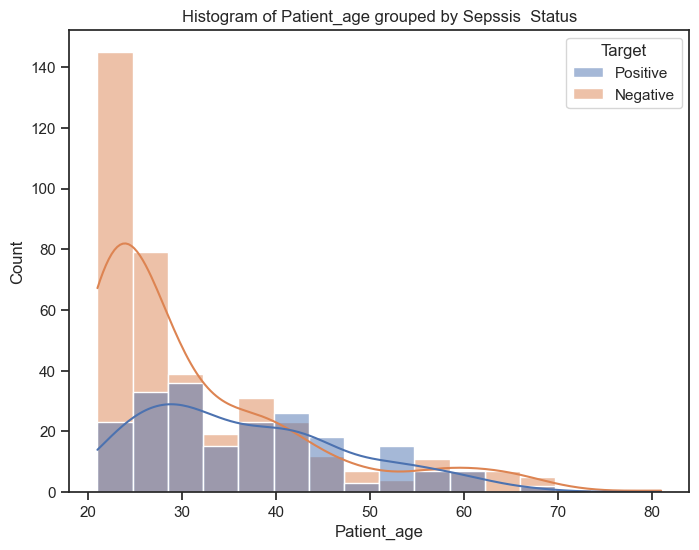

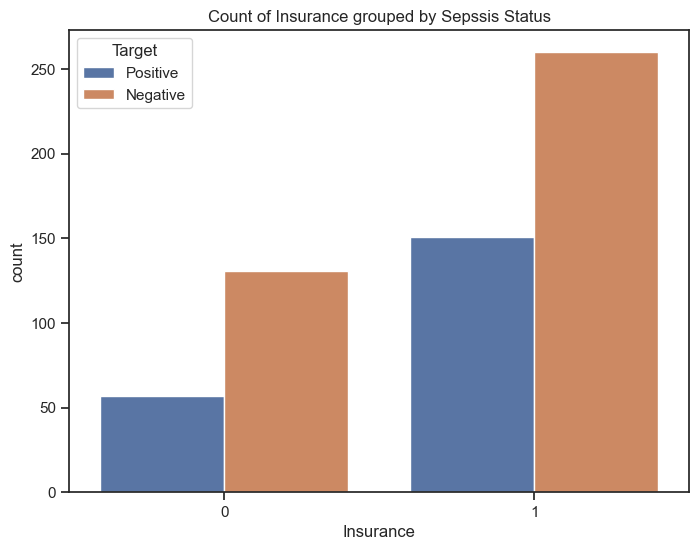

In [39]:
# Boxplots of numerical variables grouped by Sepssis Target
numeric_columns = ['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sn.boxplot(x='Target', y=column, data=train_df)
    plt.title('Boxplot of ' + column + ' grouped by Sepssis Status')
    plt.show()

# Histograms of numerical variables grouped by Sepssis Target
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sn.histplot(data=train_df, x=column, hue='Target', kde=True)
    plt.title('Histogram of ' + column + ' grouped by Sepssis  Status')
    plt.show()

# Bar plots of categorical variable (Insurance) grouped by Sepssis Target
plt.figure(figsize=(8, 6))
sn.countplot(x='Insurance', hue='Target', data=train_df)
plt.title('Count of Insurance grouped by Sepssis Status')
plt.show()

## Hypothesis Validation 

In [40]:
# Split the data into two groups based on the Sepssis variable
target_positive = train_df[train_df['Target'] == 'Positive']
target_negative= train_df[train_df['Target'] == 'Negative']

# Extract the PRG (Plasma glucose) values for each group
age_target_positive = target_positive['Patient_age']
age_target_negative = target_negative['Patient_age']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(age_target_positive, age_target_negative)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 5.254202967191448
P-Value: 2.0718778891881853e-07


Based on the t-test results, the t-statistic value is 5.254202967191448 and the p-value is 2.0718778891881853e-07.

Interpreting the results:

T-Statistic: The t-statistic measures the difference between the means of the two groups (positive and negative Sepssis Target) relative to the variability within each group. In this case, the t-statistic value of 5.254202967191448 indicates a substantial difference in the mean age between the two groups.

P-Value: The p-value is a measure of the statistical significance of the t-test results. In this case, the p-value is very small (2.0718778891881853e-07), which is less than commonly used significance levels like 0.05 or 0.01. This indicates strong evidence against the null hypothesis.

Interpretation: With a t-statistic of 5.254202967191448 and a very small p-value of 2.0718778891881853e-07, we can conclude that there is a significant difference in the mean age between patients with a positive Sepssis status and those with a negative Sepssis status. The results suggest that age may play a role in determining the likelihood of developing sepssis.




Thus We fail to accept the null hypothesis

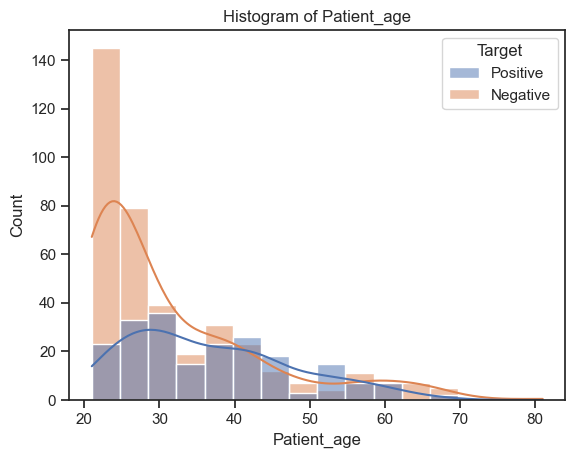

In [41]:
sn.histplot(data=train_df, x='Patient_age', hue='Target', alpha=0.5, kde=True)
plt.title(f'Histogram of Patient_age')
plt.xlabel('Patient_age')
plt.ylabel('Count')
plt.show()

### Answers

#### 1. Is the train dataset complete

In [42]:
train_df.isnull().sum()

ID                0
Plasma_glucose    0
Blood_Work_R1     0
Blood_Pressure    0
Blood_Work_R2     0
Blood_Work_R3     0
BMI               0
Blood_Work_R4     0
Patient_age       0
Insurance         0
Target            0
dtype: int64

There are no missing values in the dataset 

#### 2. What are the ages of the youngest and oldest patients

In [43]:
oldest_age = train_df['Patient_age'].max()
youngest_age= train_df['Patient_age'].min()

In [44]:
print(f'The youngest and oldest patients are {youngest_age} and {oldest_age} years respectively')

The youngest and oldest patients are 21 and 81 years respectively


#### 3. What are the youngest and oldest patients with Sepssis?

In [45]:
highest_positive_age = positive_age_stats['max']
lowest_positive_age = positive_age_stats['min']

In [46]:
print(f'The oldest and youngest patient with Sepssis is {highest_positive_age} and {lowest_positive_age}years respectively')

The oldest and youngest patient with Sepssis is 67.0 and 21.0years respectively


#### 4. What is the average age ?


In [47]:
average_age = train_df['Patient_age'].mean()
print(f'The Average age is {average_age:.2f} years old')

The Average age is 33.29 years old


#### 5. What is the ratio of patients who are positive for sepssis to the negative patients ?


In [48]:
# Calculate the count of positive and negative patients
positive_count = train_df[train_df['Target'] == 'Positive'].shape[0]
negative_count = train_df[train_df['Target'] == 'Negative'].shape[0]

# Calculate the ratio
ratio = positive_count / negative_count

print(f'The ratio of patientrs positive for sepssis to negative patients is {ratio:.2f}')

The ratio of patientrs positive for sepssis to negative patients is 0.53


#### 6.What is the highest and lowest BMI?


In [49]:
highest_bmi = train_df['BMI'].max()
lowest_bmi= train_df['BMI'].min()

print(f'The highest and lowest BMI is {highest_bmi:.2f} and {lowest_bmi:.2f} respectively')

The highest and lowest BMI is 67.10 and 0.00 respectively


#### 7.What is the average BMI ?


In [50]:
average_bmi = train_df['BMI'].mean()

print(f'The average BMI is {average_bmi:.2f}')

The average BMI is 31.92


#### 8.Is there a corelation between the Sepssis status and the other attributes?

In [53]:
# Replace "Positive" with 1 and "Negative" with 0
train_df['Target'] = train_df['Target'].replace({'Positive': 1, 'Negative': 0})

# Print the updated DataFrame
train_df.head(5)

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Target
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,1
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,0
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,1
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,0
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,1


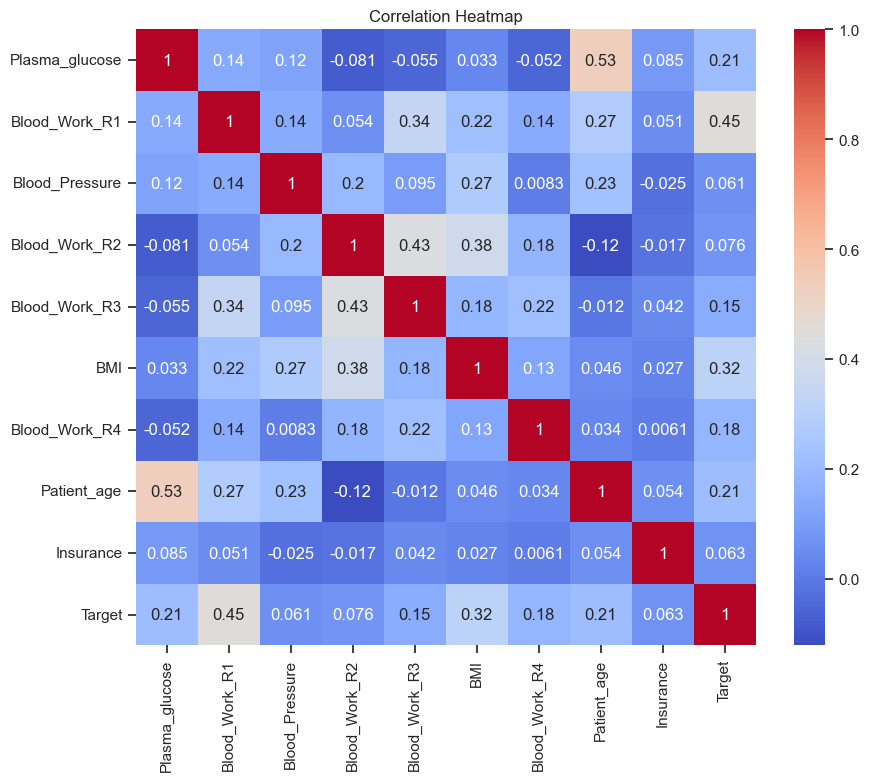

In [54]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()





In [56]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a DataFrame from the correlation matrix
correlation_table = pd.DataFrame(correlation_matrix)

# Print the correlation table
correlation_table

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Target
Plasma_glucose,1.000000,0.139541,0.116680,-0.080902,-0.054812,0.033482,-0.052230,0.532545,0.084631,0.207115
Blood_Work_R1,0.139541,1.000000,0.143064,0.054430,0.339818,0.215949,0.144665,0.274057,0.050993,0.449719
Blood_Pressure,0.116680,0.143064,1.000000,0.197535,0.095281,0.269482,0.008318,0.225625,-0.025365,0.061086
Blood_Work_R2,-0.080902,0.054430,0.197535,1.000000,0.429068,0.377950,0.176592,-0.121553,-0.017360,0.075585
Blood_Work_R3,-0.054812,0.339818,0.095281,0.429068,1.000000,0.184747,0.218313,-0.011523,0.041560,0.145892
BMI,0.033482,0.215949,0.269482,0.377950,0.184747,1.000000,0.127675,0.046117,0.026826,0.315894
Blood_Work_R4,-0.052230,0.144665,0.008318,0.176592,0.218313,0.127675,1.000000,0.033567,0.006114,0.181561
Patient_age,0.532545,0.274057,0.225625,-0.121553,-0.011523,0.046117,0.033567,1.000000,0.054368,0.210234
Insurance,0.084631,0.050993,-0.025365,-0.017360,0.041560,0.026826,0.006114,0.054368,1.000000,0.062582
Target,0.207115,0.449719,0.061086,0.075585,0.145892,0.315894,0.181561,0.210234,0.062582,1.000000


In [57]:

# Set the threshold for high correlation
threshold = 0.5

# Find the highly correlated variables
high_correlation = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)

# Get the variable pairs with high correlation
high_correlation_pairs = [(i, j) for i in high_correlation.columns for j in high_correlation.columns if high_correlation.loc[i, j]]

# Print the highly correlated variables
for pair in high_correlation_pairs:
    var1, var2 = pair
    correlation_value = correlation_matrix.loc[var1, var2]
    print(f"{var1} and {var2} are highly correlated (correlation value: {correlation_value})")


Plasma_glucose and Patient_age are highly correlated (correlation value: 0.5325446086908504)
Patient_age and Plasma_glucose are highly correlated (correlation value: 0.5325446086908504)
